In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

In [ ]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

In [ ]:
print(df.describe())

In [ ]:
iris.target_names

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['target'] = iris.target
sns.pairplot(df,hue='target')
plt.show()

# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

<figure style="text-align:center;">
    <img src='http://www.nabla.hr/SlopeInterceptLineEqu.gif' alt='lin_reg'/>
    <figcaption>This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept.</figcaption>
</figure>

[2.2571694264550644, 1.252729445898609, 3.484818291579621, 2.5919827533072164, 2.4803783110231654, 1.3643338881826594, 2.368773868739115, 3.484818291579621, 2.5919827533072164, 2.2571694264550644, 3.1500049647274695, 1.0295205613305076, 1.1411250036145582, 1.0295205613305076, 1.252729445898609, 2.703587195591267, 3.373213849295571, 2.145564984171014, 2.368773868739115, 3.373213849295571, 1.1411250036145582, 2.9267960801593684, 1.3643338881826594, 3.26160940701152, 3.1500049647274695, 3.484818291579621, 2.9267960801593684, 3.484818291579621, 1.252729445898609, 1.1411250036145582]
[6.1 5.7 7.7 6.  6.8 5.4 5.6 6.9 6.2 5.8 6.5 4.8 5.5 4.9 5.1 6.3 6.5 5.6
 5.7 6.4 4.7 6.1 5.  6.4 7.9 6.7 6.7 6.8 4.8 4.8]
3.65214776009837 13.519034990383428


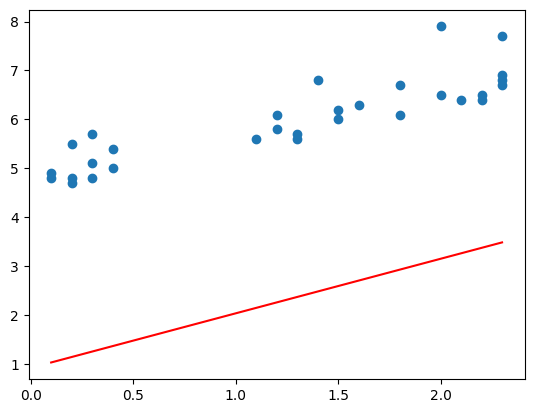

In [4]:
from LinearRegressionSkeleton import LinearRegression

model = LinearRegression(1000, 0.001)

model.fit(model.X, model.y)
model.predict(model.X_test)

print(model.MAE(), model.MSE())

model.plot_result()

In [ ]:
X = df['petal width (cm)'].values
y = df['sepal length (cm)'].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
plt.scatter(X_train, y_train)
plt.show()

In [ ]:
# Building the model
m = 0
c = 0

L = 0.0005  # The learning Rate
epochs = 3000  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
losses = []
for i in range(epochs): 
    y_pred = m*X_train + c  # The current predicted value of Y

    residuals = y_pred - y_train
    loss = np.sum(residuals ** 2)
    losses.append(loss)
    D_m = (-2/n) * sum(X_train * residuals)  # Derivative wrt m
    D_c = (-2/n) * sum(residuals)  # Derivative wrt c
    m = m + L * D_m  # Update m
    c = c + L * D_c  # Update c
    if i % 100 == 0:
        print(np.mean(y_train-y_pred))
    

In [ ]:
# Visualize the loss
plt.plot(losses)

In [ ]:
# Run the model on the test set
pred = []
for X in X_test:
    y_pred = m*X + c
    pred.append(y_pred)
print(pred)
print(y_test)

In [ ]:
# Calculate the Mean Absolue Error
print("Mean Absolute Error:", np.mean(np.abs(y_pred - y_test)))

# Calculate the Mean Squared Error
print("Mean Squared Error:", np.mean((y_pred - y_test)**2))


In [ ]:
# Making predictions
y_pred = m*X_test + c

plt.scatter(X_test, y_test)
plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()